In [2]:
#from rcparams import *
#from utilities import *
# cosmology related modules

# for catalogues generation
from scipy.stats import uniform

import random as rnd
from scipy import stats

#general tools
import sys
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import scipy.fftpack
from numpy.fft import *
from scipy.integrate import quad
import scipy.special
from statistics import mean
from matplotlib import pyplot as plt 
import matplotlib.colors as colors
import math
from collections import defaultdict

In [2]:
from scipy.stats import gaussian_kde

In [5]:
# Mn,an,zn,thn,tmn,moptn,wt,md,nsnrd,i,1m,1m,6m,1y

In [3]:
data=np.loadtxt("data_snrs.dat");

In [4]:
q3nod10=data
q3nod10[:,-6]=q3nod10[:,-3]
q3nod10=q3nod10[:,:-4]
q3nod10=q3nod10[(q3nod10[:, -2] >= 10)]

In [5]:
file_name = "q3nd1m10.dat"
    # Save the array to a .dat file
np.savetxt(file_name, q3nod10, delimiter=' ')

In [3]:
data=np.loadtxt("q3nd1m10.dat");

In [5]:
q3nod10=data

In [ ]:
d10=q3nod10[:, [0, 1, 2, 3, 5, -1]]
unique_rows10,indices10 = np.unique(d10, axis=0,return_index=True)
ind10=np.sort(indices10)

## To count probability of encountering this mass with SNR$\geq10$ at least once

In [6]:
q3nod20 = q3nod10[(q3nod10[:, -2] >= 20)]

In [7]:
q3nod50 = q3nod10[(q3nod10[:, -2] >= 50)]

In [8]:
q3nod100 = q3nod10[(q3nod10[:, -2] >= 100)]

In [9]:
q3nod1000 = q3nod10[(q3nod10[:, -2] >= 1000)]

In [10]:
q3nod10000 = q3nod10[(q3nod10[:, -2] >= 10000)]

In [11]:
max(q3nod10000[:,-2]) #maximum SNR that appears

39466.20055306617

In [12]:
q3nod10000[np.argmax(q3nod10000[:,-2])] # the system 

array([2.74850000e+06, 9.50000000e-01, 1.68220000e-01, 2.65797844e+00,
       2.36550000e+07, 1.59970030e-17, 7.14995693e-05, 1.57470030e-17,
       3.94662006e+04, 2.71000000e+03])

In [ ]:
#q3nod10
# Mn,an,zn,thn,tmn,moptn,wt,md,nsnrd,i

I want to  find the 'expectation value' of each mass,i.e. how 

In [11]:
d10=q3nod10[:, [0, 1, 2, 3, 5, -1]]
unique_rows10,indices10 = np.unique(d10, axis=0,return_index=True)
ind10=np.sort(indices10)

d20=q3nod20[:, [0, 1, 2, 3, 5, -1]]
unique_rows20,indices20 = np.unique(d20, axis=0,return_index=True)
ind20=np.sort(indices20)

d50=q3nod50[:, [0, 1, 2, 3, 5, -1]]
unique_rows50,indices50 = np.unique(d50, axis=0,return_index=True)
ind50=np.sort(indices50)

d100=q3nod100[:, [0, 1, 2, 3, 5, -1]]
unique_rows100,indices100 = np.unique(d100, axis=0,return_index=True)
ind100=np.sort(indices100)

d1000=q3nod1000[:, [0, 1, 2, 3, 5, -1]]
unique_rows1000,indices1000 = np.unique(d1000, axis=0,return_index=True)
ind1000=np.sort(indices1000)

d10000=q3nod10000[:, [0, 1, 2, 3, 5, -1]]
unique_rows10000,indices10000 = np.unique(d10000, axis=0,return_index=True)
ind10000=np.sort(indices10000)

In [41]:
ind20

array([       0,       23,       76, ..., 12062860, 12062862, 12062919])

In [42]:
q3nod20[ind20[-90],-1]

5571.0

In [ ]:
ind10 # each index represents a different system (!)

In [27]:
np.sort(q3nod10[ind10[0]:ind10[1],-3])

array([1.46376428e-16, 1.48876428e-16, 1.51376428e-16, 1.53876428e-16,
       1.56376428e-16, 1.58876428e-16, 1.61376428e-16, 1.63876428e-16,
       1.66376428e-16, 1.68876428e-16, 1.71376428e-16, 1.73876428e-16,
       1.76376428e-16, 1.78876428e-16, 1.81376428e-16, 1.83876428e-16,
       1.86376428e-16, 1.88876428e-16, 1.91376428e-16, 1.93876428e-16,
       1.96376428e-16, 1.98876428e-16, 2.01376428e-16, 2.03876428e-16,
       2.06376428e-16, 2.08876428e-16, 2.11376428e-16, 2.13876428e-16,
       2.16376428e-16, 2.18876428e-16, 2.21376428e-16, 2.23876428e-16])

In [31]:
np.sort(q3nod10[ind10[-2]:ind10[-1],-3])

array([3.77902376e-16, 3.80402376e-16, 3.82902376e-16, 3.85402376e-16,
       3.87902376e-16, 3.90402376e-16, 3.92902376e-16, 3.95402376e-16,
       3.97902376e-16, 4.00402376e-16, 4.02902376e-16, 4.05402376e-16,
       4.07902376e-16])

In [32]:
q3nod10[ind10[-2]:ind10[-1],-1]

array([5572., 5572., 5572., 5572., 5572., 5572., 5572., 5572., 5572.,
       5572., 5572., 5572., 5572.])

In [12]:
q3nod10mass = []
for i in range(len(ind10)):
    if i==len(ind10)-1:
        d = np.sort(q3nod10[ind10[-1]:,-3])
    else:
        d = np.sort(q3nod10[ind10[i]:ind10[i+1],-3])
    q3nod10mass.append([q3nod10[ind10[i],0],q3nod10[ind10[i],1],q3nod10[ind10[i],2],q3nod10[ind10[i],3],q3nod10[ind10[i],-1],d[0],d[-1]])
q3nod10mass=np.array(q3nod10mass)

q3nod20mass = []
for i in range(len(ind20)):
    if i==len(ind20)-1:
        d = np.sort(q3nod20[ind20[-1]:,-3])
    else:
        d = np.sort(q3nod20[ind20[i]:ind20[i+1],-3])
    q3nod20mass.append([q3nod20[ind20[i],0],q3nod20[ind20[i],1],q3nod20[ind20[i],2],q3nod20[ind20[i],3],q3nod20[ind20[i],-1],d[0],d[-1]])
q3nod20mass=np.array(q3nod20mass)

q3nod50mass = []
for i in range(len(ind50)):
    if i==len(ind50)-1:
        d = np.sort(q3nod50[ind50[-1]:,-3])
    else:
        d = np.sort(q3nod50[ind50[i]:ind50[i+1],-3])
    q3nod50mass.append([q3nod50[ind50[i],0],q3nod50[ind50[i],1],q3nod50[ind50[i],2],q3nod50[ind50[i],3],q3nod50[ind50[i],-1],d[0],d[-1]])
q3nod50mass=np.array(q3nod50mass)

q3nod100mass = []
for i in range(len(ind100)):
    if i==len(ind100)-1:
        d = np.sort(q3nod100[ind100[-1]:,-3])
    else:
        d = np.sort(q3nod100[ind100[i]:ind100[i+1],-3])
    q3nod100mass.append([q3nod100[ind100[i],0],q3nod100[ind100[i],1],q3nod100[ind100[i],2],q3nod100[ind100[i],3],q3nod100[ind100[i],-1],d[0],d[-1]])
q3nod100mass=np.array(q3nod100mass)

q3nod1000mass = []
for i in range(len(ind1000)):
    if i==len(ind1000)-1:
        d = np.sort(q3nod1000[ind1000[-1]:,-3])
    else:
        d = np.sort(q3nod1000[ind1000[i]:ind1000[i+1],-3])
    q3nod1000mass.append([q3nod1000[ind1000[i],0],q3nod1000[ind1000[i],1],q3nod1000[ind1000[i],2],q3nod1000[ind1000[i],3],q3nod1000[ind1000[i],-1],d[0],d[-1]])
q3nod1000mass=np.array(q3nod1000mass)

q3nod10000mass = []
for i in range(len(ind10000)):
    if i==len(ind10000)-1:
        d = np.sort(q3nod10000[ind10000[-1]:,-3])
    else:
        d = np.sort(q3nod10000[ind10000[i]:ind10000[i+1],-3])
    q3nod10000mass.append([q3nod10000[ind10000[i],0],q3nod10000[ind10000[i],1],q3nod10000[ind10000[i],2],q3nod10000[ind10000[i],3],q3nod10000[ind10000[i],-1],d[0],d[-1]])
q3nod10000mass=np.array(q3nod10000mass)

In [ ]:
# Mn,an,zn,thn,tmn,i, mmin,mmax

In [13]:
file_path = "1mq3nod10mass.dat"

# Save the array to a .dat file
np.savetxt(file_path, q3nod10mass, delimiter=' ')

In [14]:
file_path = "1mq3nod20mass.dat"

# Save the array to a .dat file
np.savetxt(file_path, q3nod20mass, delimiter=' ')

In [15]:
file_path = "1mq3nod50mass.dat"

# Save the array to a .dat file
np.savetxt(file_path, q3nod50mass, delimiter=' ')

In [16]:
file_path = "1mq3nod1000mass.dat"

# Save the array to a .dat file
np.savetxt(file_path, q3nod1000mass, delimiter=' ')

In [17]:
file_path = "1mq3nod100mass.dat"

# Save the array to a .dat file
np.savetxt(file_path, q3nod100mass, delimiter=' ')

In [18]:
file_path = "1mq3nod10000mass.dat"

# Save the array to a .dat file
np.savetxt(file_path, q3nod10000mass, delimiter=' ')

In [82]:
q3nod10mass=np.loadtxt("q3nod10mass.dat");
q3nod20mass=np.loadtxt("q3nod20mass.dat");
q3nod50mass=np.loadtxt("q3nod50mass.dat");
q3nod100mass=np.loadtxt("q3nod100mass.dat");
q3nod1000mass=np.loadtxt("q3nod1000mass.dat");
q3nod10000mass=np.loadtxt("q3nod10000mass.dat");

In [19]:
tot_r=5573 # number of total realizations

In [20]:
m = np.linspace(-17.5,-15,101)

In [21]:
# List to hold results
m10 = []

for i in range(len(m)):
    d10 = q3nod10mass[(np.log10(q3nod10mass[:, -2]) <= m[i]) & (np.log10(q3nod10mass[:, -1]) >= m[i])]
    #print(np.unique(d10[:,-3]))
    c = len(np.unique(d10[:,-3]))
    m10.append([m[i],c])

In [22]:
m10=np.array(m10)

In [23]:
# List to hold results
m20 = []

for i in range(len(m)):
    d20 = q3nod20mass[(np.log10(q3nod20mass[:, -2]) <= m[i]) & (np.log10(q3nod20mass[:, -1]) >= m[i])]
    #print(np.unique(d10[:,-3]))
    c = len(np.unique(d20[:,-3]))
    m20.append([m[i],c])
m20=np.array(m20)

In [24]:
# List to hold results
m50 = []

for i in range(len(m)):
    d50 = q3nod50mass[(np.log10(q3nod50mass[:, -2]) <= m[i]) & (np.log10(q3nod50mass[:, -1]) >= m[i])]
    #print(np.unique(d10[:,-3]))
    c = len(np.unique(d50[:,-3]))
    m50.append([m[i],c])
m50=np.array(m50)

In [25]:
# List to hold results
m100 = []

for i in range(len(m)):
    d100 = q3nod100mass[(np.log10(q3nod100mass[:, -2]) <= m[i]) & (np.log10(q3nod100mass[:, -1]) >= m[i])]
    #print(np.unique(d10[:,-3]))
    c = len(np.unique(d100[:,-3]))
    m100.append([m[i],c])
m100=np.array(m100)

In [26]:
# List to hold results
m1000 = []

for i in range(len(m)):
    d1000 = q3nod1000mass[(np.log10(q3nod1000mass[:, -2]) <= m[i]) & (np.log10(q3nod1000mass[:, -1]) >= m[i])]
    #print(np.unique(d10[:,-3]))
    c = len(np.unique(d1000[:,-3]))
    m1000.append([m[i],c])
m1000=np.array(m1000)

In [27]:
# List to hold results
m10000 = []

for i in range(len(m)):
    d10000 = q3nod10000mass[(np.log10(q3nod10000mass[:, -2]) <= m[i]) & (np.log10(q3nod10000mass[:, -1]) >= m[i])]
    #print(np.unique(d10[:,-3]))
    c = len(np.unique(d10000[:,-3]))
    m10000.append([m[i],c])
m10000=np.array(m10000)

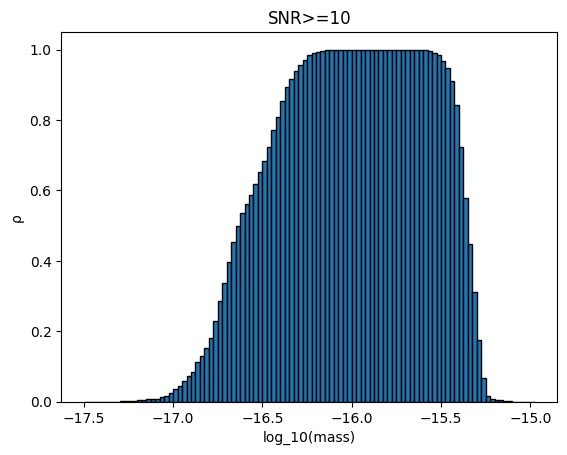

In [28]:
bins = m10[:, 0]
counts = m10[:, 1]

# Calculate the width of each bin
bin_widths = bins[1]-bins[0]

# Create the bar plot
plt.bar(bins, counts/tot_r, width=bin_widths, align='edge', edgecolor='black')

# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.title('SNR>=10')

# Display the plot
plt.show()

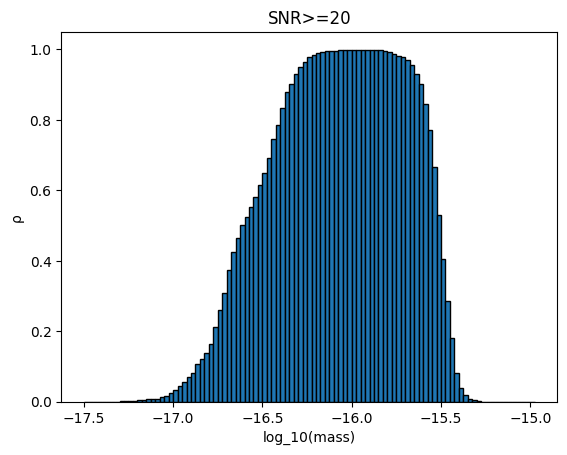

In [29]:
bins = m20[:, 0]
counts = m20[:, 1]

# Calculate the width of each bin
bin_widths = bins[1]-bins[0]

# Create the bar plot
plt.bar(bins, counts/tot_r, width=bin_widths, align='edge', edgecolor='black')

# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.title('SNR>=20')

# Display the plot
plt.show()

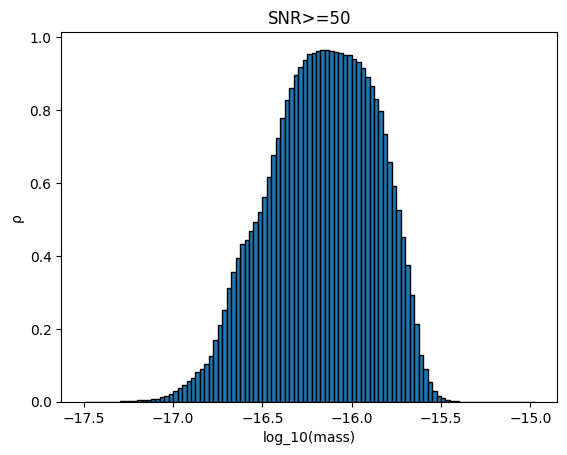

In [30]:
bins = m50[:, 0]
counts = m50[:, 1]

# Calculate the width of each bin
bin_widths = bins[1]-bins[0]

# Create the bar plot
plt.bar(bins, counts/tot_r, width=bin_widths, align='edge', edgecolor='black')

# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.title('SNR>=50')

# Display the plot
plt.show()

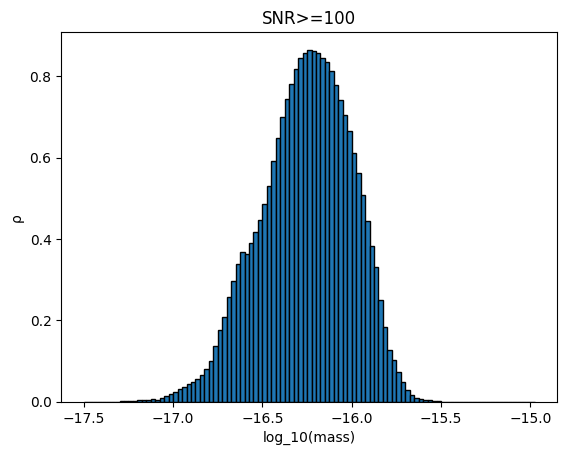

In [31]:
bins = m100[:, 0]
counts = m100[:, 1]

# Calculate the width of each bin
bin_widths = bins[1]-bins[0]

# Create the bar plot
plt.bar(bins, counts/tot_r, width=bin_widths, align='edge', edgecolor='black')

# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.title('SNR>=100')

# Display the plot
plt.show()

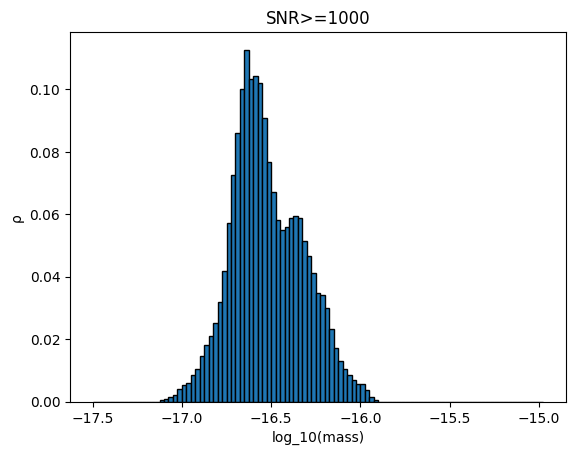

In [32]:
bins = m1000[:, 0]
counts = m1000[:, 1]

# Calculate the width of each bin
bin_widths = bins[1]-bins[0]

# Create the bar plot
plt.bar(bins, counts/tot_r, width=bin_widths, align='edge', edgecolor='black')

# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.title('SNR>=1000')

# Display the plot
plt.show()

In [33]:
from scipy.interpolate import make_interp_spline

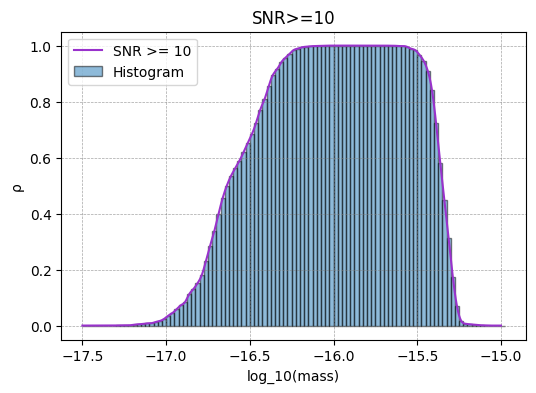

In [34]:
# Example data
bins = m10[:, 0]
counts = m10[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='darkorchid', label='SNR >= 10')
plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.title('SNR>=10')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


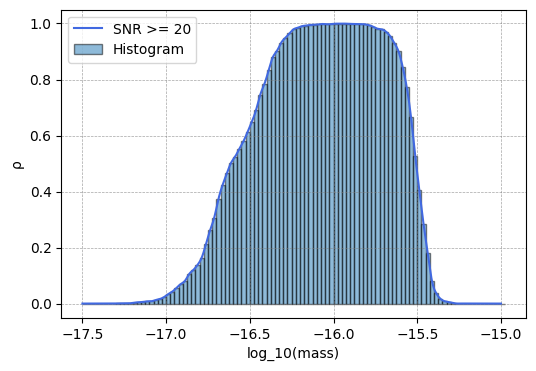

In [35]:
# Example data
bins = m20[:, 0]
counts = m20[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='royalblue', label='SNR >= 20')
plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


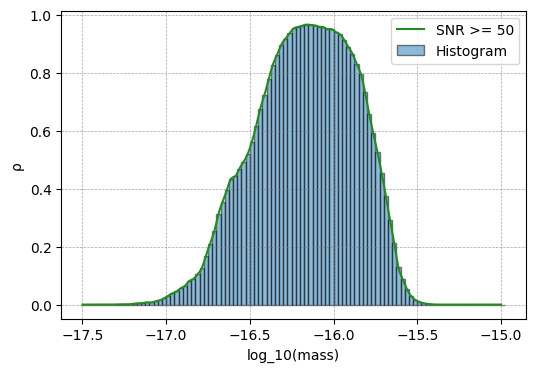

In [36]:
# Example data
bins = m50[:, 0]
counts = m50[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='SNR >= 50')
plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


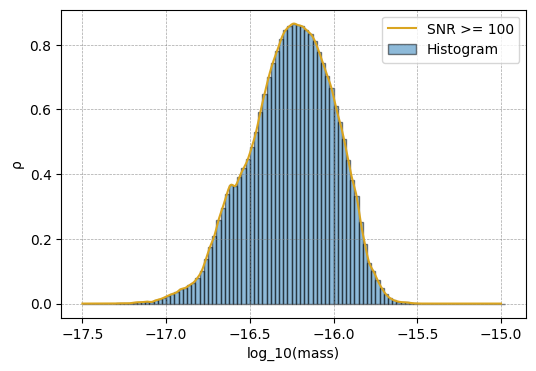

In [37]:
# Example data
bins = m100[:, 0]
counts = m100[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='goldenrod', label='SNR >= 100')
plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


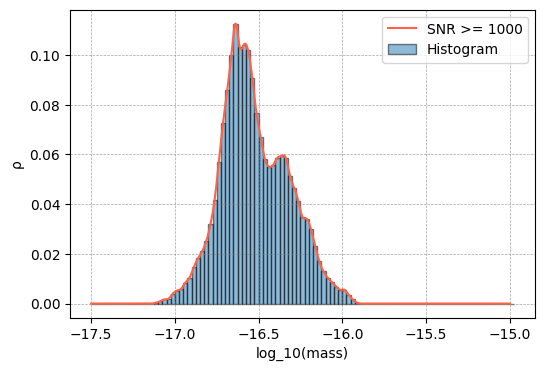

In [38]:
# Example data
bins = m1000[:, 0]
counts = m1000[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='tomato', label='SNR >= 1000')
plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


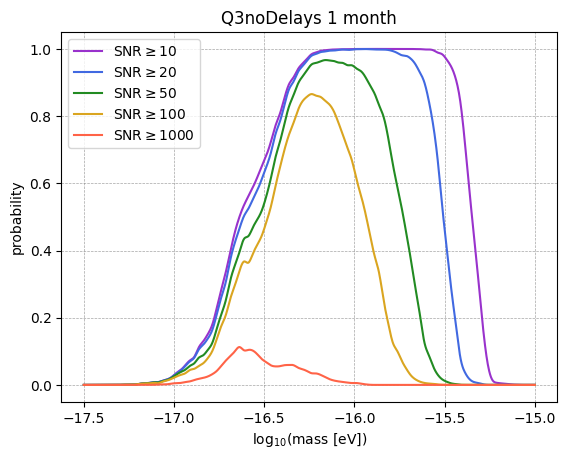

In [39]:

bins = m10[:, 0]
counts = m10[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid10 = np.linspace(bins.min(), bins.max(), 1000)
spline_values10 = spline(x_grid10)


bins = m20[:, 0]
counts = m20[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid20 = np.linspace(bins.min(), bins.max(), 1000)
spline_values20 = spline(x_grid20)



bins = m50[:, 0]
counts = m50[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid50 = np.linspace(bins.min(), bins.max(), 1000)
spline_values50 = spline(x_grid50)


bins = m100[:, 0]
counts = m100[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid100 = np.linspace(bins.min(), bins.max(), 1000)
spline_values100 = spline(x_grid100)


bins = m1000[:, 0]
counts = m1000[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts / tot_r

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid1000 = np.linspace(bins.min(), bins.max(), 1000)
spline_values1000 = spline(x_grid1000)



# Create the bar plot
#plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')

# Plot the smoothed spline line
plt.plot(x_grid10, spline_values10, color='darkorchid', label='SNR$\geq$10')

# Plot the smoothed spline line
plt.plot(x_grid20, spline_values20, color='royalblue', label='SNR$\geq$20')

# Plot the smoothed spline line
plt.plot(x_grid50, spline_values50, color='forestgreen', label='SNR$\geq$50')

# Plot the smoothed spline line
plt.plot(x_grid100, spline_values100, color='goldenrod', label='SNR$\geq$100')

# Plot the smoothed spline line
plt.plot(x_grid1000, spline_values1000, color='tomato', label='SNR$\geq$1000')

# Plot the smoothed spline line
#plt.plot(x_grid10000, spline_values10000, color='darkturquoise', label='Smoothed Spline')


# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adding labels and title for clarity
plt.xlabel('log$_{10}$(mass [eV])')
plt.ylabel('probability')
plt.legend()
plt.title('Q3noDelays 1 month')
plt.savefig('1mQ3nodprob.eps', format='eps')
# Display the plot
plt.show()


## Expectation value of each mass. I.e. how 'often' is this mass encountered with SNR$\geq 10$  

In [ ]:
#q3nod10=np.loadtxt("q3nod10.dat");

In [ ]:
#q3nod10
# Mn,an,zn,thn,tmn,moptn,wt,md,nsnrd,i

In [ ]:
#q3nod10mass
#Mn,an,zn,thn,i,μmin,μmax

In [6]:
q3nod10mass=np.loadtxt("q3nod10mass.dat");

In [61]:
m = np.linspace(-17.5,-15,101)

In [62]:
# List to hold results
m10 = []

for i in range(len(m)):
    d10 = q3nod10mass[(np.log10(q3nod10mass[:, -2]) <= m[i]) & (np.log10(q3nod10mass[:, -1]) >= m[i])]
    #print(np.unique(d10[:,-3]))
    c = len(np.unique(d10[:,-3]))
    m10.append([m[i],c])

In [27]:
realz=np.unique(q3nod10mass[:,-3]).astype(int)

In [120]:
q3nod10ev = np.zeros((m.shape[0],tot_r+1))

for i in realz:
    tem=q3nod10mass[q3nod10mass[:,-3] == i]
    for j in range(len(m)):
        d10 = tem[(np.log10(tem[:, -2]) <= m[j]) & (np.log10(tem[:, -1]) >= m[j])]
        d10=d10[:,:5]
        c = len(np.unique(d10, axis=0))
        q3nod10ev[j,i+1]=c
q3nod10ev[:,0]

In [ ]:
errs=np.zeros((m.shape[0],))
errs=max(q3nod10ev[i,1:])

In [127]:
countsm=[]
for j in range(len(m)):
    meanm=np.mean(q3nod10ev[j,1:])
    stdm=np.std(q3nod10ev[j,1:])
    maxc=max(q3nod10ev[j,1:])
    minc=min(q3nod10ev[j,1:])
    countsm.append([m[j],meanm,stdm,maxc,minc])

In [128]:
countsm=np.array(countsm)

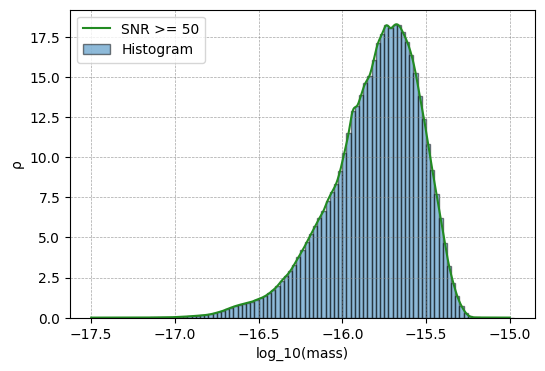

In [44]:
# Example data
bins = countsm[:, 0]
counts = countsm[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts 

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='SNR >= 50')
plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


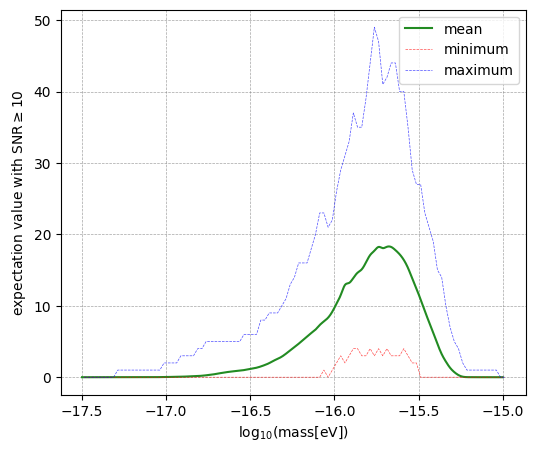

In [145]:
# Example data
# Assuming countsm is already defined and has shape (n, 2)
bins = countsm[:, 0]
counts = countsm[:, 1]
# Assuming errors is already defined and has the same length as counts
errors = countsm[:, 2]  # or any other array of errors

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts

# Create the figure
fig = plt.figure(figsize=(6, 5))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='mean')

# Plot the histogram with error bars
#plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
plt.plot(bins + bin_widths / 2,countsm[:,-1],color='red', linestyle='--', linewidth=0.5, alpha=0.7,label='minimum')
plt.plot(bins + bin_widths / 2,countsm[:,-2],color='blue', linestyle='--', linewidth=0.5, alpha=0.7,label='maximum')

# Adding labels and title for clarity
plt.xlabel('log$_{{10}}$(mass[eV])')
plt.ylabel('expectation value with SNR$\geq$10')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


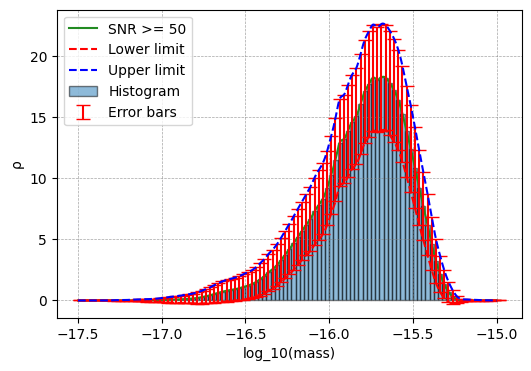

In [47]:

# Assuming countsm is already defined and has shape (n, 2)
bins = countsm[:, 0]
counts = countsm[:, 1]
# Assuming errors is already defined and has the same length as counts
errors = countsm[:, 2]  # or any other array of errors

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create splines for the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Calculate the lower and upper limits of the error bars
lower_limits = normalized_counts - errors
upper_limits = normalized_counts + errors

# Create splines for the lower and upper limits
spline_lower = make_interp_spline(bin_centers, lower_limits)
spline_upper = make_interp_spline(bin_centers, upper_limits)

# Evaluate the splines on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)
spline_lower_values = spline_lower(x_grid)
spline_upper_values = spline_upper(x_grid)

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='SNR >= 50')

# Plot the histogram with error bars
plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
plt.errorbar(bins + bin_widths / 2, normalized_counts, yerr=errors, fmt='none', ecolor='red', capsize=5, label='Error bars')

# Plot the splines for the lower and upper limits with dashed lines
plt.plot(x_grid, spline_lower_values, color='red', linestyle='--', label='Lower limit')
plt.plot(x_grid, spline_upper_values, color='blue', linestyle='--', label='Upper limit')

# Adding labels and title for clarity
plt.xlabel('log_10(mass)')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


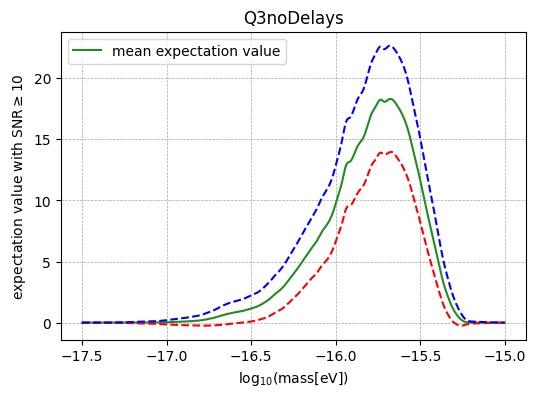

In [74]:

# Assuming countsm is already defined and has shape (n, 2)
bins = countsm[:, 0]
counts = countsm[:, 1]
# Assuming errors is already defined and has the same length as counts
errors = countsm[:, 2]  # or any other array of errors

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create splines for the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Calculate the lower and upper limits of the error bars
lower_limits = normalized_counts - errors
upper_limits = normalized_counts + errors

# Create splines for the lower and upper limits
spline_lower = make_interp_spline(bin_centers, lower_limits)
spline_upper = make_interp_spline(bin_centers, upper_limits)

# Evaluate the splines on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)
spline_lower_values = spline_lower(x_grid)
spline_upper_values = spline_upper(x_grid)

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='mean expectation value')

# Plot the histogram with error bars
#plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
#plt.errorbar(bins + bin_widths / 2, normalized_counts, yerr=errors, fmt='none', ecolor='red', capsize=5, label='Error bars')

# Plot the splines for the lower and upper limits with dashed lines
plt.plot(x_grid, spline_lower_values, color='red', linestyle='--')
plt.plot(x_grid, spline_upper_values, color='blue', linestyle='--')

# Adding labels and title for clarity
plt.xlabel('log$_{{10}}$(mass[eV])')
plt.ylabel('expectation value with SNR$\geq$10')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('Q3nodEV.jpg', format='jpg')
plt.title('Q3noDelays')
# Display the plot
plt.show()


## Mass,spin,redshift

In [ ]:
# Mn,an,zn,thn,tmn,moptn,wt,md,nsnrd,i
#q3nod10

In [254]:
np.log10(min(q3nod10[:,0]))

4.472727202912817

In [255]:
Mbh=np.linspace(4.4,7,121)

In [256]:
d10=q3nod10[:, [0, 1, 2, 3, 5, -1]]
unique_rows10,indices10 = np.unique(d10, axis=0,return_index=True)
ind10=np.sort(indices10)

In [257]:
q3nod10bhmass = []
for i in range(len(Mbh)):
    if i==len(Mbh)-1:
        q3nod10bhmass.append([Mbh[i],0])
    else:
        d10 = unique_rows10[(np.log10(unique_rows10[:, 0]) >= Mbh[i]) & (np.log10(unique_rows10[:, 0]) < Mbh[i+1])]
        c=len(np.unique(d10[:,-1]))
        q3nod10bhmass.append([Mbh[i],c])


In [258]:
q3nod10bhmass=np.array(q3nod10bhmass)

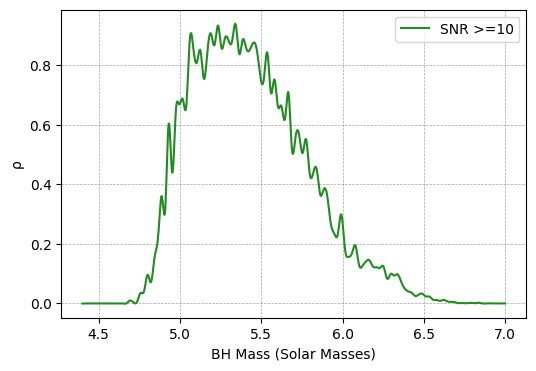

In [259]:
# Example data
bins = q3nod10bhmass[:, 0]
counts = q3nod10bhmass[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts/tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='SNR >=10')
#plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('BH Mass (Solar Masses)')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


In [260]:
(max(q3nod10[:,1]))

0.95

In [261]:
abh=np.linspace(0.6,0.955,101)

In [262]:
d10=q3nod10[:, [0, 1, 2, 3, 5, -1]]
unique_rows10,indices10 = np.unique(d10, axis=0,return_index=True)
ind10=np.sort(indices10)

In [263]:
q3nod10bhspin = []
for i in range(len(abh)):
    if i==len(abh)-1:
        q3nod10bhspin.append([abh[i],0])
    else:
        d10 = unique_rows10[(unique_rows10[:, 1] >= abh[i]) & (unique_rows10[:, 1] < abh[i+1])]
        c=len(np.unique(d10[:,-1]))
        q3nod10bhspin.append([abh[i],c])


In [264]:
q3nod10bhspin=np.array(q3nod10bhspin)

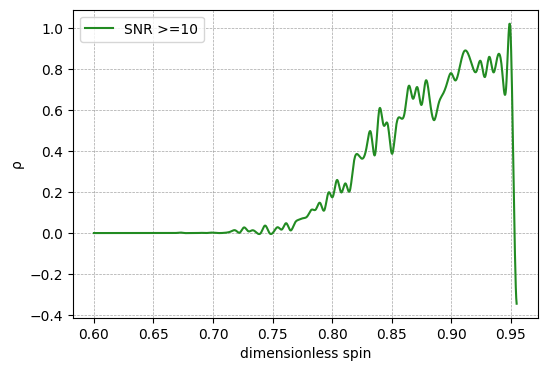

In [265]:
# Example data
bins = q3nod10bhspin[:, 0]
counts = q3nod10bhspin[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts/tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='SNR >=10')
#plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('dimensionless spin')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()


In [291]:
max(q3nod10[:,2])

19.338

In [285]:
np.log10(0.07)

-1.154901959985743

In [303]:
zbh=np.linspace(0.07,19.38,61)

In [298]:
d10=q3nod10[:, [0, 1, 2, 3, 5, -1]]
unique_rows10,indices10 = np.unique(d10, axis=0,return_index=True)
ind10=np.sort(indices10)

KeyboardInterrupt: 

In [304]:
q3nod10bhz = []
for i in range(len(zbh)):
    if i==len(zbh)-1:
        q3nod10bhz.append([zbh[i],0])
    else:
        d10 = unique_rows10[(unique_rows10[:, 2] >= zbh[i]) & (unique_rows10[:, 2] < zbh[i+1])]
        c=len(np.unique(d10[:,-1]))
        q3nod10bhz.append([zbh[i],c])


In [ ]:
q3nod10bhz = []
for i in range(len(zbh)):
    if i==len(zbh)-1:
        q3nod10bhz.append([zbh[i],0])
    else:
        d10 = unique_rows10[(np.log10(unique_rows10[:, 2]) >= zbh[i]) & (np.log10(unique_rows10[:, 2]) < zbh[i+1])]
        c=len(np.unique(d10[:,-1]))
        q3nod10bhz.append([zbh[i],c])


In [306]:
q3nod10bhz=np.array(q3nod10bhz)

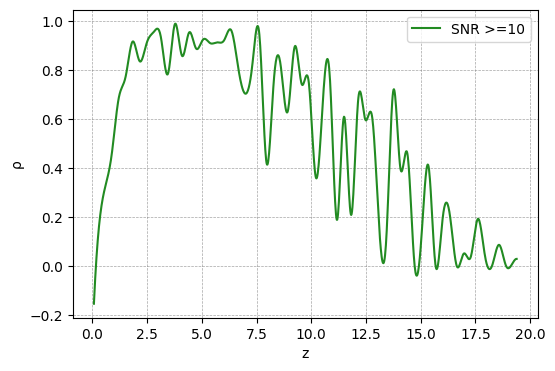

In [309]:
# Example data
bins = q3nod10bhz[:, 0]
counts = q3nod10bhz[:, 1]

# Calculate the width of each bin
bin_widths = bins[1] - bins[0]

# Normalize counts
normalized_counts = counts/tot_r

# Create the figure
fig = plt.figure(figsize=(6, 4))

# Calculate bin centers for spline interpolation
bin_centers = bins + bin_widths / 2

# Create a spline of the data
spline = make_interp_spline(bin_centers, normalized_counts)

# Evaluate the spline on a grid of points
x_grid = np.linspace(bins.min(), bins.max(), 1000)
spline_values = spline(x_grid)

# Plot the smoothed spline line
plt.plot(x_grid, spline_values, color='forestgreen', label='SNR >=10')
#plt.bar(bins, normalized_counts, width=bin_widths, align='edge', edgecolor='black', alpha=0.5, label='Histogram')
# Adding labels and title for clarity
plt.xlabel('z')
plt.ylabel('ρ')
plt.legend()

# Add a faded grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()
